In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 

In [4]:
import subprocess
from pprint import pprint

In [41]:
cmd = [f'g++ -o ./bin/generic test_generic_euler.cpp']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr.decode())

In [17]:
#setup config
cpp_config_path = "config/config.json"
config_data = {}

config_data['vel_0'] = 0
config_data['crd_0'] = 10
config_data['time_div'] = 0.01
config_data['time_begin'] = 0
config_data['time_end'] = 200
config_data['omega2'] = 1
config_data['gamma'] = 0
config_data['log'] = 1
config_data['outfile'] = "data/data.csv"
config_data['meth'] = "euler"
config_data['type'] = "driven"
config_data['force_cnt'] = 1
config_data['force_amp'] = [1]
config_data['force_omega'] = [0.9]
gamma = config_data['gamma']

In [18]:

with open(cpp_config_path, 'w') as outfile:
    json.dump(config_data, outfile)
cmd = [f'./bin/generic {cpp_config_path}']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout, cerr)
        

b'' b''


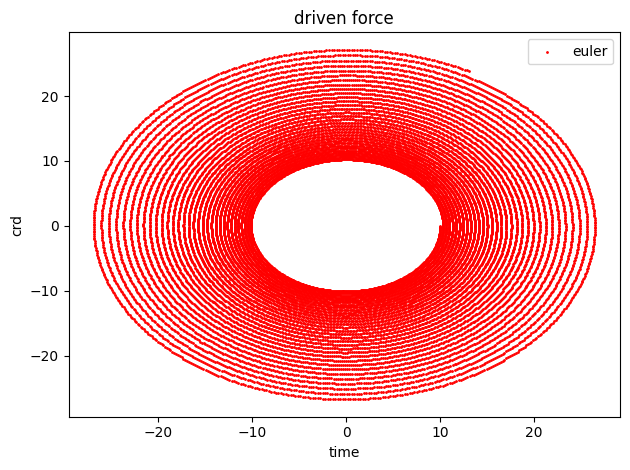

In [27]:
df = pd.read_csv(config_data['outfile'])

fig, ax = plt.subplots()

ax.scatter(df['crd'], df['vel'], color = 'r', label = 'euler', s = 1)

ax.set_xlabel('time')
ax.set_ylabel('crd')
ax.set_title(f'driven force')
fig.tight_layout()
ax.legend()
fig.savefig(f'graphs/driven_force.png')

In [28]:
def meander(time, duty, period):
    time = time % period
    if (time < duty * period):
        return -100000
    else:
        return 100000

[-100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, -100000, 

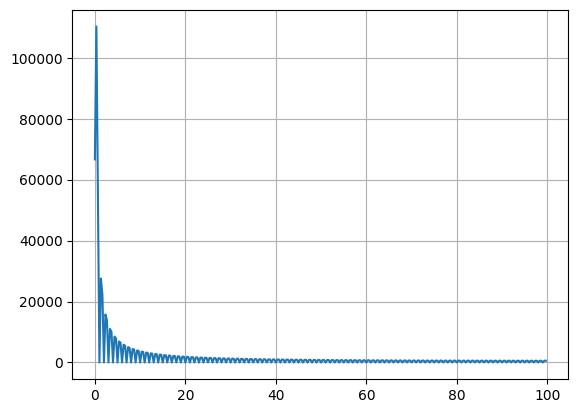

b'' b''


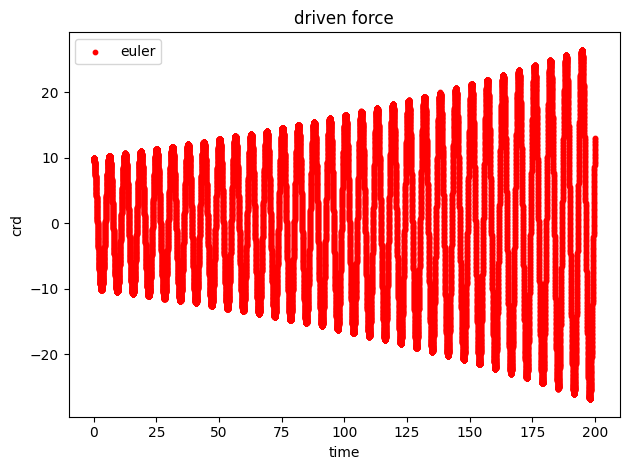

In [29]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 4.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = [meander(temp, 0.5, 4) for temp in x]
print(y)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

xf_list = (2 * 3.1415926 * xf).tolist()
yf_list = (2.0/N * np.abs(yf[0:N//2])).tolist()
config_data['force_cnt'] = len(xf_list)
config_data['force_amp'] = yf_list
config_data['force_omega'] = xf_list
with open(cpp_config_path, 'w') as outfile:
    json.dump(config_data, outfile)
cmd = [f'./bin/generic {cpp_config_path}']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout, cerr)

df = pd.read_csv(config_data['outfile'])

fig, ax = plt.subplots()

ax.scatter(df['time'], df['crd'], color = 'r', label = 'euler', s = 10)

ax.set_xlabel('time')
ax.set_ylabel('crd')
ax.set_title(f'driven force')
fig.tight_layout()
ax.legend()
fig.savefig(f'graphs/driven_force.png')
        

In [30]:

with open(cpp_config_path, 'w') as outfile:
    json.dump(config_data, outfile)
    
cmd = [f'./bin/generic {cpp_config_path}']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
        